In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fb=pd.read_csv(r"C:\ksr\data science\DS_batch1\datasets\Fiberbits_v1.csv")

In [3]:
fb.shape

(100000, 9)

In [4]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(fb,test_size=0.3,random_state=0)
print(train.shape,test.shape)

(70000, 9) (30000, 9)


In [5]:
x_train=train.drop(["active_cust"],axis=1)
y_train=train["active_cust"]
x_test=test.drop(["active_cust"],axis=1)
y_test=test["active_cust"]

In [6]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver="lbfgs")
lg.fit(x_train,y_train)

C:\Users\Koti\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [7]:
lg.score(x_train,y_train)

0.7046285714285714

In [8]:
pred=lg.predict(x_train)

In [9]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,brier_score_loss

In [10]:
accuracy_score(train["active_cust"],pred)

0.7046285714285714

In [11]:
brier_score_loss(train["active_cust"],pred)

0.29537142857142856

In [12]:
1-accuracy_score(train["active_cust"],pred)

0.2953714285714286

In [13]:
pd.crosstab(train["active_cust"],pred)

col_0,0,1
active_cust,,
0,17852,11501
1,9175,31472


In [14]:
from sklearn.metrics import confusion_matrix

In [15]:
confusion_matrix(train["active_cust"],pred)

array([[17852, 11501],
       [ 9175, 31472]], dtype=int64)

In [17]:
recall_score(train["active_cust"],pred)

0.7742760843358674

# conclusion: 77% of churners correctly identifed of total churners

In [18]:
(31472)/(9175+31472)

0.7742760843358674

In [19]:
specificity=(17852/(17852+11501))
specificity

0.6081831499335673

# Conclusion: 60% of non churners correctly identified of total non chuners

In [20]:
precision_score(train["active_cust"],pred)

0.7323668349894119

In [21]:
confusion_matrix(train["active_cust"],pred)

array([[17852, 11501],
       [ 9175, 31472]], dtype=int64)

In [22]:
(31472)/(31472+11501)

0.7323668349894119

In [23]:
(11501)/(17852+11501)

0.39181685006643274

# 39% of non churners has been identified as churners

In [24]:
false_negative=(9175)/(9175+31472)
false_negative

0.22572391566413266

# 22% of churners have been identified as non churners

In [25]:
f1_score(train["active_cust"],pred)

0.7527385792872517

In [26]:
from sklearn.metrics import roc_auc_score

In [27]:
roc_auc_score(train["active_cust"],pred)

0.6912296171347174

In [31]:
import scikitplot as skplt
import matplotlib.pyplot as plt

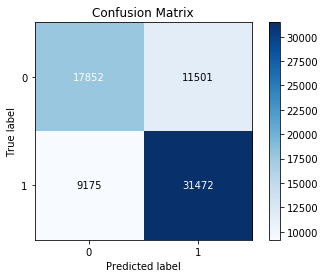

In [32]:
skplt.metrics.plot_confusion_matrix(train["active_cust"],pred)

In [58]:
prob=lg.predict_proba(x_train)[::,1]
y_true=np.array(train["active_cust"])

In [59]:
y_true

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [61]:
prob1=pd.DataFrame(prob,columns=[prob])

ValueError: Shape of passed values is (70000, 1), indices imply (70000, 70000)

In [45]:
y_true.shape

(70000,)

In [46]:
prob.shape

(70000,)

IndexError: too many indices for array

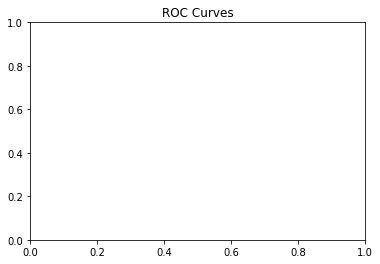

In [42]:
skplt.metrics.plot_roc(y_true,prob)
plt.show()

In [53]:
pred1=pd.DataFrame(pred,columns=["prob"])

IndexError: too many indices for array

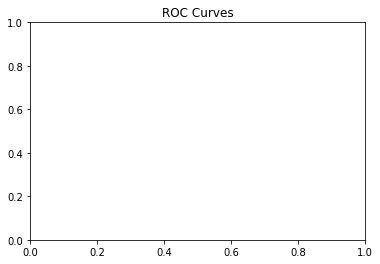

In [56]:
skplt.metrics.plot_roc(train["active_cust"],pred1["prob"])